In [211]:
from models.model_utils import load_model
from models.unet import UNet
from data.data_utils import fetch_data
import matplotlib.pyplot as plt
import numpy as np

model_unet = UNet().double()
load_model("../results/run_1/saved_model_unet9.pt", model_unet)
data_paths = ['../data/training_data_12.npz']
train_loaders = fetch_data(data_paths, batchsize=1, shuffle=False)

setting up data


In [214]:
from models.tiramisu import FCDenseNet

model_tir = FCDenseNet().double()
load_model("../results/run_1/saved_model_tiramisu4.pt", model_tir)

<All keys matched successfully>

In [231]:
for train_loader in train_loaders:
    for i, data in enumerate(train_loader):
        if i == 802:
            inputs, labels = data[0], data[1]
            outputs_unet = model_unet(inputs)
            output_tiramisu = model_tir(inputs)
            break

Text(0.5, 1.0, 'fine solver (label)')

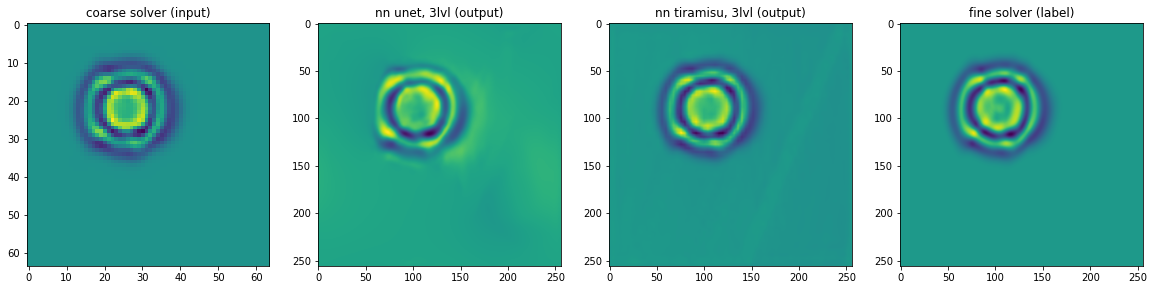

In [232]:
from mounted.WaveUtil import WaveSol_from_EnergyComponent
from skimage.transform import resize

l = [inputs[0], outputs_unet[0], output_tiramisu[0], labels[0]]
f, ax = plt.subplots(1,4)
f.set_figheight(20)
f.set_figwidth(20)
d = inputs[0][3,:,:].detach().numpy()
d2 = resize(d,(256,256))
for i, img in enumerate(l):
    if i != 0:
        d = d2
    a,b,c = img[0,:,:].detach().numpy(), img[1,:,:].detach().numpy(), img[2,:,:].detach().numpy()
    res = WaveSol_from_EnergyComponent(a,b,c,d, .1, 0)
    ax[i].imshow(res[0])
ax[0].set_title('coarse solver (input)')
ax[1].set_title('nn unet, 3lvl (output)')
ax[2].set_title('nn tiramisu, 3lvl (output)')
ax[3].set_title('fine solver (label)')